# Project: Investigating Medical Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <ul>
        <li><a href="#overview">Dataset Overview</a></li>
        <li><a href="#questions">Questions to Explore</a></li>
        <li><a href="#citation">Dataset Source</a></li>
    </ul>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#importing">Importing Data</a></li>
        <li><a href="#assessing">Assessing Data</a></li>
        <li><a href="#cleaning">Cleaning Data</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#plot_temp">Plotting Template</a></li>
        <li><a href="#dataexp">Brief Data Exploration</a></li>
        <li><a href="#q1">Q1: How does the waiting period between the scheduling date and the appointment date affect the probability of showing up?</a></li>
        <li><a href="#q2">Q2: Are people who have more than one medical condition (Hypertension and Diabetes) are more likely to show up?</a></li>
        <li><a href="#q3">Q3: How does receiving the scholarship and having chronic illness correlate to the probability of showing up?</a></li>
    </ul>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

<a id='overview'></a>
### Dataset Overview

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Fourteen characteristics about each appointment are included:

  - **PatientId:** Identification of a patient.
  - **AppointmentID:** Identification of each appointment.
  - **Gender:** Male or Female.
  - **ScheduledDay:** The day someone called or registered the appointment.
  - **AppointmentDay:** The day of the actual appointment, when they have to visit the doctor.
  - **Age:** How old is the patient.
  - **Neighbourhood:** Location of the hospital.
  - **Scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
  - **Hipertension:** True or False
  - **Diabetes:** True or False
  - **Alcoholism:** True or False
  - **Handcap:** True or False
  - **SMS_received:** 1 or more messages sent to the patient.
  - **No-show:** True or False. <u>‘No’ if the patient showed up to their appointment</u>.

<a id='questions'></a>
### Questions to Explore

  - **Q1:** How does the waiting period between the scheduling date and the appointment date affect the probability of showing up?
  - **Q2:** Are people who have more than one medical condition (Hypertension and Diabetes) are more likely to show up?
  - **Q3:** How does receiving the scholarship and having chronic illness correlate to the probability of showing up?

<a id='citation'></a>
### Dataset Source

Hoppen, J. (2016, May). Medical Appointment No Shows, Version 2. Retrieved July 22, 2021 at [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

<a id='wrangling'></a>
## Data Wrangling

<a id='importing'></a>
### Importing Data

In [1]:
# Importing all the packages that will be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #nicer plots
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='assessing'></a>
### Assessing Data

In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
'This raw dataset contains a {} sample with {} columns corresponding to {} features.'.format(df.shape[0], df.shape[1], df.shape[1])

'This raw dataset contains a 110527 sample with 14 columns corresponding to 14 features.'

This raw dataset contains a 110527 sample with 14 columns corresponding to 14 features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data types seem to be consistent with each feature, except the ` ScheduledDay ` and ` AppointmentDay ` columns. These two columns can be ` datetime ` data types instead of a string. Also, ` PatientId ` is an integer, not a float.

` info() ` shows that there are no missing values, to double-check we will use ` isnull() `.

In [5]:
df.isnull().any().sum()

0

There are no null values.

In [6]:
df.duplicated().sum()

0

There are no duplicate rows.

Next, to validate the data, the number of unique values, as well as these unique values, are examined.

In [7]:
unique_count = {} #empty dict
for col in df.columns:
    unique_count[col] = df.loc[:,col].unique().shape[0]
unique_count

{'PatientId': 61744,
 'AppointmentID': 110527,
 'Gender': 2,
 'ScheduledDay': 103549,
 'AppointmentDay': 27,
 'Age': 104,
 'Neighbourhood': 81,
 'Scholarship': 2,
 'Hipertension': 2,
 'Diabetes': 2,
 'Alcoholism': 2,
 'Handcap': 5,
 'SMS_received': 2,
 'No-show': 2}

The number of unique values for ` PatientId ` is less than the number of unique values of ` AppointmentID `, which makes sense. The same patient can make multiple appointments. It might be interesting how does 'loyality' or 'trust' correlate with being a no-show.

The number of unique values of ` AppointmentID ` is the same as the number of data samples, this indicates that there will be no duplicates.

For ` Gender `, ` Scholarship `, ` Hipertension `, ` Diabetes `, ` Alcoholism ` and ` No-show ` the number of unique values is two, and that's in line with the description of these features. On the other hand, ` Handcap ` has five values which contradict the feature description that suggests it has only two values. ` SMS_received ` has 2 values, while the feature description suggests it can have more than these two values. A possible explanation is that these two features were labeled incorrectly. Further assessment may help understanding if there is a mixup and whether we need to keep or drop these columns.

For the features with a limited number of values, let's check that these values are in line with the feature description.

In [8]:
unique_count = {} #empty dict
for col in df.columns[[2,7,8,9,10,11,12,13]]:
    unique_count[col] = df.loc[:,col].value_counts();
unique_count

{'Gender': F    71840
 M    38687
 Name: Gender, dtype: int64, 'Scholarship': 0    99666
 1    10861
 Name: Scholarship, dtype: int64, 'Hipertension': 0    88726
 1    21801
 Name: Hipertension, dtype: int64, 'Diabetes': 0    102584
 1      7943
 Name: Diabetes, dtype: int64, 'Alcoholism': 0    107167
 1      3360
 Name: Alcoholism, dtype: int64, 'Handcap': 0    108286
 1      2042
 2       183
 3        13
 4         3
 Name: Handcap, dtype: int64, 'SMS_received': 0    75045
 1    35482
 Name: SMS_received, dtype: int64, 'No-show': No     88208
 Yes    22319
 Name: No-show, dtype: int64}

The unique values of all of these features are consistent with the feature description, except ` Handcap ` and ` SMS_received `. To explore the idea that these two columns just need renaming we will take a closer look at the numbers. Out of 110527 medical appointments, having 3360 with alcoholism is realistic, but having 34585 handicapped doesn't make sense. Especially that according to the appointment dates, the country and google search, this data was collected in a no crisis time. So in normal country normal time, their medical appointments can't be 31.3% of the total appointments. This negates the idea that the column labels were just switched. 

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Most of these values were examined earlier. ` Age ` has a negative minimum value. This will be dealt with in the data cleaning stage.

<a id='cleaning'></a>
### Cleaning Data

#### Cleaning Data: Cleaning Column Labels

Here, we will be dropping extraneous columns. Then rename the rest of the columns for easy and effective use.

The ` AppointmentID ` column doesn't offer any additional input, it can be set as the index to this dataset, or we can use the default numeric index and drop this column.

In [10]:
df.drop('AppointmentID', axis=1, inplace=True)

The ` Handcap ` and ` SMS_received ` columns' values are not consistent with the provided feature description. These two values will be dropped since any conclusion based on these two values will be meaningless.

In [11]:
df.drop(['Handcap', 'SMS_received'], axis=1, inplace=True)
list(df.columns)

['PatientId',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'No-show']

To rename the columns, we are using ` .rename()`, ` lambda `, ` .lower() ` and ` .replace() `.

In [12]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", ""), inplace=True)
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,noshow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,No


What are other columns that we can drop? let's see if all columns have statistically significant information. This will be done by looking at the percentage of different unique values in each column.

#### Cleaning Data: Dealing with Missing Values

In [13]:
df.isnull().any().sum()

0

There are no missing values in this dataset.

#### Cleaning Data: Dealing with Duplicate Values

In [14]:
df.duplicated().sum()

1305

Worth noting, before deleting the ` AppointmentID ` column the number of duplicate rows was zero. This means that the same patient had the same appointment and scheduling day but with a different ` AppointmentID `.

In [15]:
df.shape

(110527, 11)

In [16]:
df.drop_duplicates(inplace=True)
df.shape

(109222, 11)

#### Cleaning Data: Data Types

Here we will be inspecting, extracting, converting, and validating the data type of each column.

In [17]:
df.dtypes

patientid         float64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
noshow             object
dtype: object

` patientid ` needs to be converted to int. ` scheduledday ` and ` appointmentday ` needs to be converted to ` datetime ` data type.

In [18]:
df['patientid']=df['patientid'].astype(int)

In [19]:
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,noshow
0,29872500000000,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,No


` scheduledday ` offers both the date and the time, while ` appointmentday ` only offers the date. We will extract the date information from the ` scheduledday `.

In [20]:
df['appointmentday'] = pd.to_datetime(pd.to_datetime(df['appointmentday']).dt.date)
df['scheduledday'] = pd.to_datetime(pd.to_datetime(df['scheduledday']).dt.date)
df['scheduledday'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: scheduledday, dtype: datetime64[ns]

In [21]:
df.dtypes

patientid                  int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
noshow                    object
dtype: object

In [22]:
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,noshow
0,29872500000000,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,No


In [23]:
df['waiting_days'] = df['appointmentday'] - df['scheduledday']
df['waiting_days'] = df['waiting_days'].dt.days
(df['waiting_days'].min(), df['waiting_days'].max())

(-6, 179)

Having a negative waiting period is incorrect, this will be examined in the next section.

Now that the ` scheduledday ` variable was used to generate the independent variable ` waiting_days `, it has no additional value. This column will be dropped.

In [24]:
df.drop('scheduledday', axis=1, inplace=True)

Another time-associated factor to consider is the weekday.

In [25]:
df['weekday']=df['appointmentday'].dt.strftime("%A")

Since the data in the `noshow` column is binary, we will convert it to int so that it's more analysis-friendly.

In [26]:
df.noshow = df.noshow.replace('Yes', 1).replace('No', 0)

#### Cleaning Data: Dealing with Incorrect Values

Earlier we validated most of these variables and we signaled out the negative age for cleaning. Here we will focus on the variables, that we changed its type: ` patientid ` and ` appointmentday `. Also, we will focus on our new dependent variable ` waiting_days `.

In [27]:
df[['patientid', 'appointmentday', 'age', 'waiting_days']].min()

patientid                       39200
appointmentday    2016-04-29 00:00:00
age                                -1
waiting_days                       -6
dtype: object

In [28]:
df[['patientid', 'appointmentday', 'age', 'waiting_days']].max()

patientid             999982000000000
appointmentday    2016-06-08 00:00:00
age                               115
waiting_days                      179
dtype: object

` waiting_days ` shouldn't be negative. This means that for some data samples the ` scheduledday ` came after the ` appointmentday `, and that can't be correct. We will assess how often that happens and drop these samples if they have a low number of occurrence.

In [29]:
df[df['waiting_days'] < 0].count()[0]

5

In [30]:
#df = df.drop(list(df[df['appointmentday'] < df['scheduledday']].index), axis=0)
df = df.drop(list(df[df['waiting_days'] < 0].index), axis=0)

To check the date value and range, we will look at the minimum and maximum.

In [31]:
(df['appointmentday'].min(), df['appointmentday'].max())

(Timestamp('2016-04-29 00:00:00'), Timestamp('2016-06-08 00:00:00'))

Both dates are valid. It shows that the appointments occurred during a period of fewer than 40 days. So this data doesn't capture different seasons of the year and other factors associated with time diversity.

In [32]:
# df.drop('appointmentday', axis=1, inplace=True)

Earlier, we recognized that age has a negative value. Let's identify the non-positive age occurrences, and see if they will be replaced with mean age, or dropped (based on how often this occurs compared to the dataset size).

In [33]:
df[df.age <= 0].age.count()

3525

Assuming age zero is a correct value corresponding to a newborn. We will only be filtering out negative age values.

In [34]:
df[df.age < 0].age.count()

1

Since the number of occurrences of this is too low, we will be dropping the rows with a negative age value.

In [35]:
df.shape

(109217, 12)

In [36]:
df = df.drop(list(df[df['age'] < 0].index), axis=0)

In [37]:
df.shape

(109216, 12)

#### Cleaning Data: Dealing with Outliers

Most of the given features have a binary outcome, and we validated their output. The only column where we might find outliers is in ` age `. It's between 0 and 115 which seems correct. But a box plot will help determine if we need to drop some values.

[array([ 18.,   0.]), array([  55.,  102.])]

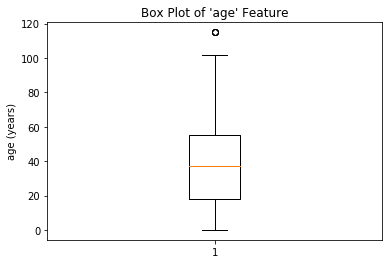

In [38]:
B = plt.boxplot(df.age)
plt.title("Box Plot of 'age' Feature")
plt.ylabel("age (years)")
[item.get_ydata() for item in B['whiskers']]

In [39]:
df[df.age > 102].age.sum()

460

In [40]:
df = df.drop(list(df[df['age'] > 102].index), axis=0)

### Clean Data:

In [41]:
df.dtypes

patientid                  int64
gender                    object
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
noshow                     int64
waiting_days               int64
weekday                   object
dtype: object

In [42]:
df.head()

,patientid,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,noshow,waiting_days,weekday
0,29872500000000,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Friday
1,558998000000000,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Friday
2,4262960000000,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Friday
3,867951000000,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Friday
4,8841190000000,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Friday


In [43]:
df.shape

(109212, 12)

<a id='eda'></a>
## Exploratory Data Analysis

Usually, to explore and recognize trends, we plot histograms and scattering plots for different variables. Most of the data here are binary so both of these graphs are not useful. Age, weekday, and waiting days can be explored using histograms.

<a id='plot_temp'></a>
### Plotting Template

Given the data type and the number of unique values that they have, histograms, box plots, and bar charts are very essential in the data analysis process. Since we will be plotting several factors, we will add these plots as functions to generate unified organized charts.

In [44]:
def plt_hist(df_x, feature, bins_x=14):
    """Histogram 
    
    INPUT:
    df_x: data frame
    feature: filtration feature, will represent the x-axis
    bins_x: number of histogram bins
    
    OUTPUT: 
    A histogram.
    """
    df_x.hist(alpha=0.5, bins=bins_x, color='blue', figsize=(8,4));
    
    plt.xlabel(feature.title().replace('_',' '), size = 12)
    plt.ylabel('Number of Patients', size = 12)
    plt.title('{} Histogram'.format(feature.title().replace('_',' ')), size = 12)
    plt.xticks(size = 12)
    plt.yticks(size = 12);


In [45]:
def plt_box(df_x, feature):
    """Box Plot 
    
    INPUT:
    df_x: data frame
    feature: filtration feature, will represent the x-axis
    
    OUTPUT: 
    A box plot.
    The 5 numbers summary (min, Q1, Q2, Q3, max)
    """
    B = plt.boxplot(df_x)
    
    plt.title("Box Plot of {} Feature".format(feature.title().replace('_',' ')))
    plt.ylabel(feature.title().replace('_',' '))
    [(min_x, q1), (q2, max_x)]=[item.get_ydata() for item in B['whiskers']]
    
    print('minimum = {}, Q1 = {}, Q2 = {}, Q3 = {} and maximum = {}'.format(min_x, q1, round(df_x.mean(),2), q2, max_x))

In [46]:
def plt_bar_stack(df_x, feature, y_type='abs'):
    """Stacked Bar Chart 
    This is a custom function for this dataset.
    
    INPUT:
    df_x: data frame
    feature: str. filtration feature, will represent the x-axis and each unique value will represent a bar
    y_type: str. to chose whether to plot the values in each column as absolute values or percentage
    
    OUTPUT: 
    Bar chart, each bar is divided into two parts, the lower part represents the no-show
    while the upper part represents the patients who showed up.
    """
    i = list(df_x[feature].value_counts().index) # column index
    col_count = len(df_x[feature].unique())      # number of columns
    tot_count = df_x[feature].value_counts()     # total number of values at each column
    
    # Changing the column index for columns with binary option
    if col_count == 2 and i[0] == 0 and i[1] ==1:
        i[0] = 'No'
        i[1] = 'Yes'
    
    # dividing number of values at each column to 'show' and 'noshow'
    val_show = df_x[feature][df_x['noshow'] == 0].value_counts()
    val_noshow = df_x[feature][df_x['noshow'] == 1].value_counts()
    
    # converting it to percentage of the total number of values at each column
    val_show_perc = val_show / tot_count * 100
    val_noshow_perc = val_noshow / tot_count * 100
    
    # chosing between absolute or percentage y axis
    if y_type == 'abs':
        p1 = val_show
        p2 = val_noshow
    else: 
        y_type == 'perc'
        p1 = val_show_perc
        p2 = val_noshow_perc
        
    # setting the chart width
    if col_count < 2:
        size_x = 4
    elif col_count < 8:
        size_x = col_count * 2
    else:
        size_x = 16
    
    bar_width = 0.4
    
    fig, ax = plt.subplots(figsize=(size_x, 4))
    
    ax.bar(i, p1, bar_width, label = 'Show', bottom = p2)
    ax.bar(i, p2, bar_width, label = 'No Show')
    
    if y_type == 'perc':
        plt.ylim(0, 110)   # setting a maximum Y limit in case of percentage plat
        plt.yticks(np.arange(0, 110, step=10))
    
    plt.legend(fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=12)
    plt.xlabel(feature.title().replace('_',' '), fontsize=15)
    plt.ylabel('Number of Patients' + ' (%)' if y_type == 'perc' else '', fontsize=15)
    plt.title('Bar Chart for {} Feature'.format(feature.title().replace('_',' ')), fontsize=15);
    
    if col_count < 10:
        for k in range(col_count):
            print('Number of ({} = {}) that didn\'t show is {} out of total of {} which is a {} %.'
                  .format(feature, i[k], val_noshow[k], tot_count[k], round(val_noshow_perc[k], 1))
                 )

The number of the no-show will be at the bottom so that it's clearer to compare the number of the no-show across different columns as if we are plotting the number of the no-show in a separate bar chart.

In [47]:
def group_stat(df, group_feature):
    """This function prints information about grouped features 
    This is a custom function for this dataset
    
    INPUT:
    df: data frame
    group_feature: str. or list of str. groupby features
    
    OUTPUT: 
    Printing the noshow count and percentage for different grouping options
    """    
    df_group = df.groupby(group_feature)['noshow']
    
    _sum = df_group.sum()
    _tot = df_group.count()
    _perc = _sum / _tot * 100
        
    i = list(_sum.index) # index

    for k in range(len(i)):
        print('Number of ({} = {}) that didn\'t show is {} out of total of {} which is a {} %.'
              .format(group_feature, i[k], _sum[i[k]], _tot[i[k]], round(_perc[i[k]], 1))
             )

<a id='dataexp'></a>
### Brief Data Exploration

Here, different features will be explored using the plotting functions introduced in the previous section.

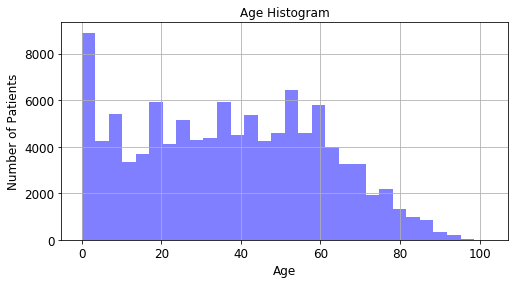

In [48]:
plt_hist(df.age, 'age', 30)

The majority of the patients are newborns and children.

Number of (gender = F) that didn't show is 14315 out of total of 70983 which is a 20.2 %.
Number of (gender = M) that didn't show is 7556 out of total of 38229 which is a 19.8 %.


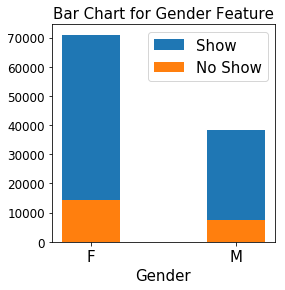

In [49]:
plt_bar_stack(df, 'gender')

The majority of the patients are females. Although at first glance it appears that females have a higher probability of no-show. The probability of both genders is the same ~20%.

Number of (weekday = Wednesday) that didn't show is 5029 out of total of 25581 which is a 21.1 %.
Number of (weekday = Tuesday) that didn't show is 4993 out of total of 25317 which is a 20.5 %.
Number of (weekday = Monday) that didn't show is 4595 out of total of 22450 which is a 19.2 %.
Number of (weekday = Friday) that didn't show is 3964 out of total of 18744 which is a 19.9 %.
Number of (weekday = Thursday) that didn't show is 3281 out of total of 17081 which is a 19.5 %.


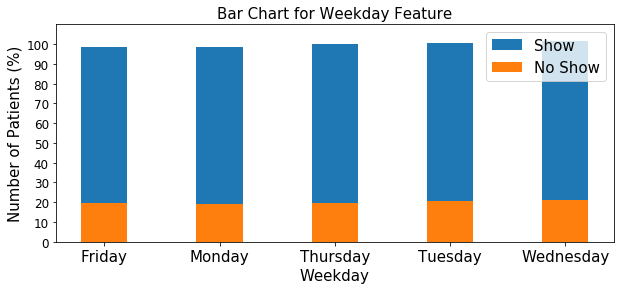

In [50]:
plt_bar_stack(df[df['weekday'] != 'Saturday'], 'weekday', 'perc')

Middle of the week (Wednesday) has a ~1% higher probability of no-show and it's the day with the highest appointment number.

<a id='q1'></a>
### Research Question 1: How does the waiting period between the scheduling date and the appointment date affect the probability of showing up?

Exploring the histogram of the number of waiting days:

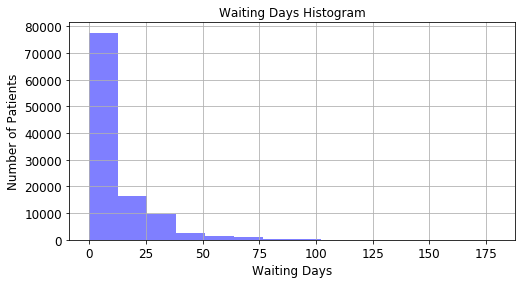

In [51]:
plt_hist(df.waiting_days, 'waiting_days', 14)

The histogram is skewed to the right. That means most of the scheduling are made close to the day of the appointment. Looking at how much this distribution is skewed, this indicates that people scheduling few months in advance is an outlier. To recognize the outliers better, a box plot will be used.

minimum = 0.0, Q1 = 0.0, Q2 = 10.07, Q3 = 14.0 and maximum = 35.0


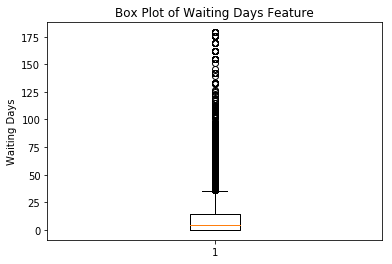

In [52]:
plt_box(df.waiting_days, 'waiting_days')

According to the box plot $Q_1=\min=0$, $Q_2=10$, $Q_3=14, \max=35$

In [53]:
df_waiting = df.drop(list(df[df['waiting_days'] > 15].index), axis=0)

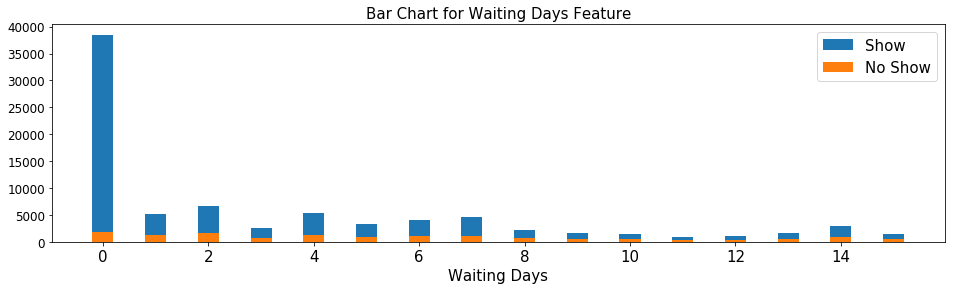

In [54]:
plt_bar_stack(df_waiting, 'waiting_days')

This bar chart shows that most of the scheduling is done on the visitation day. Two days, four days, seven days and onde in advance are also common. To accurately answer the posed question we will need to look at the percentage as well.

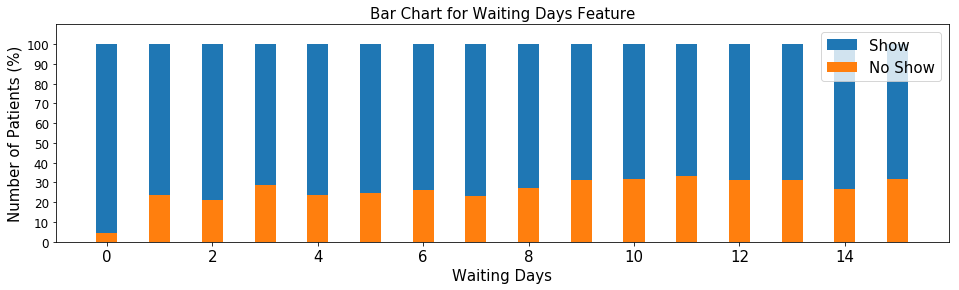

In [55]:
plt_bar_stack(df_waiting, 'waiting_days', 'perc')

This shows that there is a high correlation between making the reservation on the same appointment day. Most of the patients who make the reservation on the same day are more likely to show up, 95% to be accurate. More than 20% of patients making the reservation in advance, don't show up. 

<a id='q2'></a>
### Research Question 2: Are people who have more than one medical condition (Hypertension and Diabetes) are more likely to show up?

Since both `hipertension` and `diabetes` columns are integers, we can add them. We expect that the summation will take one of three values: `0` if the patient doesn't suffer from any of these diseases, `1` if he suffers from one of these diseases, and `2` if he is suffering from both diseases.

In [56]:
df['medical_condition'] = df['hipertension'] + df['diabetes']

Number of (medical_condition = 0) that didn't show is 17890 out of total of 86215 which is a 20.8 %.
Number of (medical_condition = 1) that didn't show is 2856 out of total of 16590 which is a 17.2 %.
Number of (medical_condition = 2) that didn't show is 1125 out of total of 6407 which is a 17.6 %.


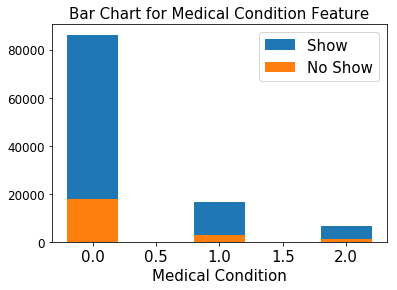

In [57]:
plt_bar_stack(df, 'medical_condition')

Number of (medical_condition = 0) that didn't show is 17890 out of total of 86215 which is a 20.8 %.
Number of (medical_condition = 1) that didn't show is 2856 out of total of 16590 which is a 17.2 %.
Number of (medical_condition = 2) that didn't show is 1125 out of total of 6407 which is a 17.6 %.


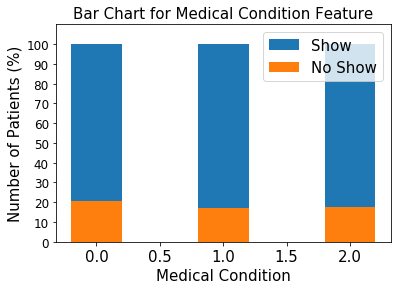

In [58]:
plt_bar_stack(df, 'medical_condition', 'perc')

People with chronic illness have a ~3 % less chance of showing up to their appointment.

<a id='q3'></a>
### Research Question 3: How does receiving the scholarship and having chronic illness correlate to the probability of showing up?

Number of (scholarship = No) that didn't show is 19339 out of total of 98483 which is a 19.6 %.
Number of (scholarship = Yes) that didn't show is 2532 out of total of 10729 which is a 23.6 %.


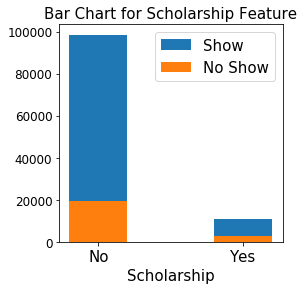

In [59]:
plt_bar_stack(df, 'scholarship')

People who are receiving the scholarship have a 4% higher chance of not showing up. This indicates that the medical service cost is not the limitation. It will be interesting to also have data about how paying in advance affects your likelihood of showing up.

In [60]:
group_stat(df, ['scholarship', 'hipertension'])

Number of (['scholarship', 'hipertension'] = (0, 0)) that didn't show is 16010 out of total of 78793 which is a 20.3 %.
Number of (['scholarship', 'hipertension'] = (0, 1)) that didn't show is 3329 out of total of 19690 which is a 16.9 %.
Number of (['scholarship', 'hipertension'] = (1, 0)) that didn't show is 2166 out of total of 8864 which is a 24.4 %.
Number of (['scholarship', 'hipertension'] = (1, 1)) that didn't show is 366 out of total of 1865 which is a 19.6 %.


We can clearly see that people who are receiving the scholarship and don't have hypertension are more likely to not show up, than those who have hypertension. And they are 7.4 % more likely to not show up compared to those that have no scholarship and have hypertension.

In [61]:
group_stat(df, ['scholarship', 'diabetes'])

Number of (['scholarship', 'diabetes'] = (0, 0)) that didn't show is 18050 out of total of 91198 which is a 19.8 %.
Number of (['scholarship', 'diabetes'] = (0, 1)) that didn't show is 1289 out of total of 7285 which is a 17.7 %.
Number of (['scholarship', 'diabetes'] = (1, 0)) that didn't show is 2410 out of total of 10165 which is a 23.7 %.
Number of (['scholarship', 'diabetes'] = (1, 1)) that didn't show is 122 out of total of 564 which is a 21.6 %.


People with diabetes exhibits the same trend first observed with people with hypertension. We can conclude that people with no chronic illness and receiving the scholarship have a high probability of not showing up to their appointment.

<a id='conclusion'></a>
## Conclusion



In this analysis, a dataset of medical appointments was used with the main goal of recognizing the correlation between different factors and the probability that a patient won't show up. It was shown that people who schedule their appointment on the same day are more likely to show up. Likewise, people with no chronic illnesses like diabetes and hypertension are more likely to show up. People who are receiving the scholarship and have no chronic illness will are less likely to show up. There are a lot of other factors and correlations that weren't addressed in this analysis, but for the purpose of this project, the focus was limited to address these three questions.

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0